<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/Regression-Projects/blob/main/03-Cricket_Player_Sold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cricket Player Sold Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
# load data
data = pd.read_csv('IPL IMB381IPL2013.csv')

In [ ]:
# Data Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('SubSet of Data:\n ', data.head().to_string(), '\n')
print('Data Information:\n '); print(data.info(), '\n')
print('Data Describe:\n ', data.describe(), '\n')
print('Columns Names:', data.columns, '\n')

Number of Rows:  130
Number of Columns:  26 

SubSet of Data:
     Sl.NO.   PLAYER NAME  AGE COUNTRY  TEAM PLAYING ROLE  T-RUNS  T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL  CAPTAINCY EXP  RUNS-S  HS    AVE    SR-B  SIXERS  RUNS-C  WKTS  AVE-BL   ECON  SR-BL  AUCTION YEAR  BASE PRICE  SOLD PRICE
0       1   Abdulla, YA    2      SA  KXIP   Allrounder       0       0           0      0.00         0        0.0              0       0   0   0.00    0.00       0     307    15   20.47   8.90  13.93          2009       50000       50000
1       2  Abdur Razzak    2     BAN   RCB       Bowler     214      18         657     71.41       185       37.6              0       0   0   0.00    0.00       0      29     0    0.00  14.50   0.00          2008       50000       50000
2       3   Agarkar, AB    2     IND   KKR       Bowler     571      58        1269     80.62       288       32.9              0     167  39  18.56  121.01       5    1059    29   36.52   8.81  24.90          2008     

### Feature Notes

In [ ]:
# Notes
''''
TEAM': there is teamName and teamName+
'AGE': Divided to 3 classes 
'PLAYING ROLe': Divided to 4 positions
'''

# AGE
print("The number of AGE which equal 1: ", data[data['AGE'] == 1].shape[0])
print("The number of AGE which equal 2: ", data[data['AGE'] == 2].shape[0])
print("The number of AGE which equal 3: ", data[data['AGE'] == 3].shape[0])

# PLAYING ROLE
print("Batsman Number: ", data[data['PLAYING ROLE'] == 'Batsman'].shape[0])
print("Bowler Number : ", data[data['PLAYING ROLE'] == 'Bowler'].shape[0])
print("Allrounder Number: ", data[data['PLAYING ROLE'] == 'Allrounder'].shape[0])
print("W. Keeper Number: ", data[data['PLAYING ROLE'] == 'W. Keeper'].shape[0])

The number of AGE which equal 1:  16
The number of AGE which equal 2:  86
The number of AGE which equal 3:  28
Batsman Number:  39
Bowler Number :  44
Allrounder Number:  35
W. Keeper Number:  12


In [ ]:
# Convert Categorical Data
data['PLAYING ROLE'].replace(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'],[1, 2, 3, 4], inplace=True)

# Drop by logic
data.drop(['Sl.NO.', 'PLAYER NAME', 'COUNTRY', 'TEAM'], axis=1, inplace=True)
print(data.head().to_string())
print(data.shape)        # (130, 23)
print(data.dtypes)

   AGE  PLAYING ROLE  T-RUNS  T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL  CAPTAINCY EXP  RUNS-S  HS    AVE    SR-B  SIXERS  RUNS-C  WKTS  AVE-BL   ECON  SR-BL  AUCTION YEAR  BASE PRICE  SOLD PRICE
0    2             1       0       0           0      0.00         0        0.0              0       0   0   0.00    0.00       0     307    15   20.47   8.90  13.93          2009       50000       50000
1    2             2     214      18         657     71.41       185       37.6              0       0   0   0.00    0.00       0      29     0    0.00  14.50   0.00          2008       50000       50000
2    2             2     571      58        1269     80.62       288       32.9              0     167  39  18.56  121.01       5    1059    29   36.52   8.81  24.90          2008      200000      350000
3    1             2     284      31         241     84.56        51       36.8              0      58  11   5.80   76.32       0    1125    49   22.96   6.23  22.14          2011     

###  Multi-Col-linearity 'VIF'


In [ ]:
# Store correlation ascending before Using VIF
corr = data.corr()['SOLD PRICE'].sort_values(ascending=False)

print('VIF:\n ')
features = data.iloc[:, :-1]
vif_data = pd.DataFrame()
vif_data['Features'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i)
                   for i in range(features.shape[1])]
print(vif_data, '\n')

# Feature With high and low VIF
features_with_high_VIF = vif_data[vif_data['VIF'] > 10]
features_with_low_VIF = vif_data[vif_data['VIF'] < 10]
print(features_with_low_VIF[['Features', 'VIF']])
print('Number of Predictors: ', features_with_low_VIF['Features'].count())

# Drop high VIF Features
data.drop(features_with_high_VIF['Features'], axis=1, inplace=True)
print('Data Shape After drop high VIF: ', data.shape)

# Check VIF again
features = data.iloc[:, :-1]
vif_data = pd.DataFrame()
vif_data['Features'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i)
                   for i in range(features.shape[1])]
print('New VIF:\n ', vif_data, '\n')

VIF:
 
         Features        VIF
0             AGE  25.260992
1    PLAYING ROLE  15.142700
2          T-RUNS  11.525583
3          T-WKTS   6.710451
4      ODI-RUNS-S  14.939517
5        ODI-SR-B  13.493014
6        ODI-WKTS   8.376533
7       ODI-SR-BL   4.020240
8   CAPTAINCY EXP   3.759920
9          RUNS-S  12.852138
10             HS  19.233794
11            AVE  24.665436
12           SR-B  20.289272
13         SIXERS   8.333520
14         RUNS-C  32.823680
15           WKTS  30.534512
16         AVE-BL  89.732105
17           ECON   6.446951
18          SR-BL  92.576268
19   AUCTION YEAR  66.157241
20     BASE PRICE   4.479072 

         Features       VIF
3          T-WKTS  6.710451
6        ODI-WKTS  8.376533
7       ODI-SR-BL  4.020240
8   CAPTAINCY EXP  3.759920
13         SIXERS  8.333520
17           ECON  6.446951
20     BASE PRICE  4.479072
Number of Predictors:  7
Data Shape After drop high VIF:  (130, 8)
New VIF:
          Features       VIF
0         T-WKTS  3.9800

### Correlation

Correlation before check Multi-Col-linearity (VIF): 
SOLD PRICE       1.000000
BASE PRICE       0.523510
RUNS-S           0.478510
SIXERS           0.450609
AVE              0.396519
HS               0.347473
ODI-RUNS-S       0.337834
CAPTAINCY EXP    0.318835
ODI-SR-B         0.226880
T-RUNS           0.216752
SR-B             0.184278
AVE-BL           0.128406
SR-BL            0.118296
AUCTION YEAR     0.117700
RUNS-C           0.116476
ODI-WKTS         0.112327
PLAYING ROLE     0.083621
ODI-SR-BL        0.075408
WKTS             0.053796
ECON             0.040679
T-WKTS           0.035767
AGE             -0.106201
Name: SOLD PRICE, dtype: float64
Correlation after check Multi-Col-linearity (VIF) and drop high VIF: 
SOLD PRICE       1.000000
BASE PRICE       0.523510
SIXERS           0.450609
CAPTAINCY EXP    0.318835
ODI-WKTS         0.112327
ODI-SR-BL        0.075408
ECON             0.040679
T-WKTS           0.035767
Name: SOLD PRICE, dtype: float64


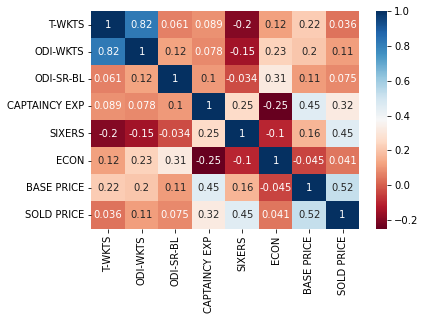

In [ ]:
print('Correlation before check Multi-Col-linearity (VIF): ')
print(corr)
print('Correlation after check Multi-Col-linearity (VIF) and drop high VIF: ')
print(data.corr()['SOLD PRICE'].sort_values(ascending=False))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

- 'T-WKTS' and 'ODI-WKTS' are highly correlated so i will drop 'T-WKTS'
- 'Econ' seems to low correlated with 'Sold price'

(130, 3)


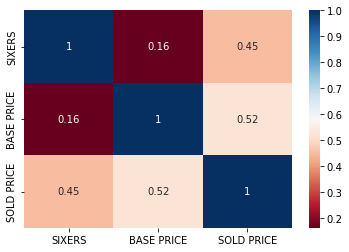

In [ ]:
data.drop(['T-WKTS', 'ECON', 'ODI-SR-BL', 'ODI-WKTS', 'CAPTAINCY EXP'], axis=1, inplace=True)
print(data.shape)
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()


In [ ]:
# Building Model
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
# train & test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Linear Regression

In [ ]:
linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_predict = linReg.predict(x_test)
print('MSE:', int(np.sqrt(mean_squared_error(y_test, y_predict))))
r_score = r2_score(y_test, y_predict) * 100
print("linear Regression model accuracy(in %):", int(r_score), '%')
print('Model intercept: ', linReg.intercept_)
print('Model coefficient: ', linReg.coef_)
print('***********************************************************')
# OLS
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())


MSE: 335904
linear Regression model accuracy(in %): 36 %
Model intercept:  164100.50419229694
Model coefficient:  [6.34690939e+03 1.17097434e+00]
***********************************************************
                                 OLS Regression Results                                
Dep. Variable:             SOLD PRICE   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              133.4
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                    1.66e-27
Time:                        17:13:15   Log-Likelihood:                         -1281.8
No. Observations:                  91   AIC:                                      2568.
Df Residuals:                      89   BIC:                                      2573.
Df Model:                           2                                                  
Co